# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

 ### Data Prep
 
- Import in the standard libraries (NumPy, pandas, matplotlib)
- Read in the CSV
- Explore the data set, the columns and the types

In [39]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime 
import matplotlib.pyplot as plt
import datetime
import math
##
df=pd.read_csv('2013_movies.csv')
df.dtypes
#df=df.dropna()
#df.plot(y='DomesticTotalGross', x='ReleaseDate',kind='scatter')
print(df)

                                    Title       Budget  DomesticTotalGross  \
0         The Hunger Games: Catching Fire  130000000.0           424668047   
1                              Iron Man 3  200000000.0           409013994   
2                                  Frozen  150000000.0           400738009   
3                         Despicable Me 2   76000000.0           368061265   
4                            Man of Steel  225000000.0           291045518   
5                                 Gravity  100000000.0           274092705   
6                     Monsters University          NaN           268492764   
7     The Hobbit: The Desolation of Smaug          NaN           258366855   
8                        Fast & Furious 6  160000000.0           238679850   
9               Oz The Great and Powerful  215000000.0           234911825   
10                Star Trek Into Darkness  190000000.0           228778661   
11                   Thor: The Dark World  170000000.0          

### Exercise 1 
 
- Plot Domestic Total Gross over Time.
- Try a scatterplot and a line plot.

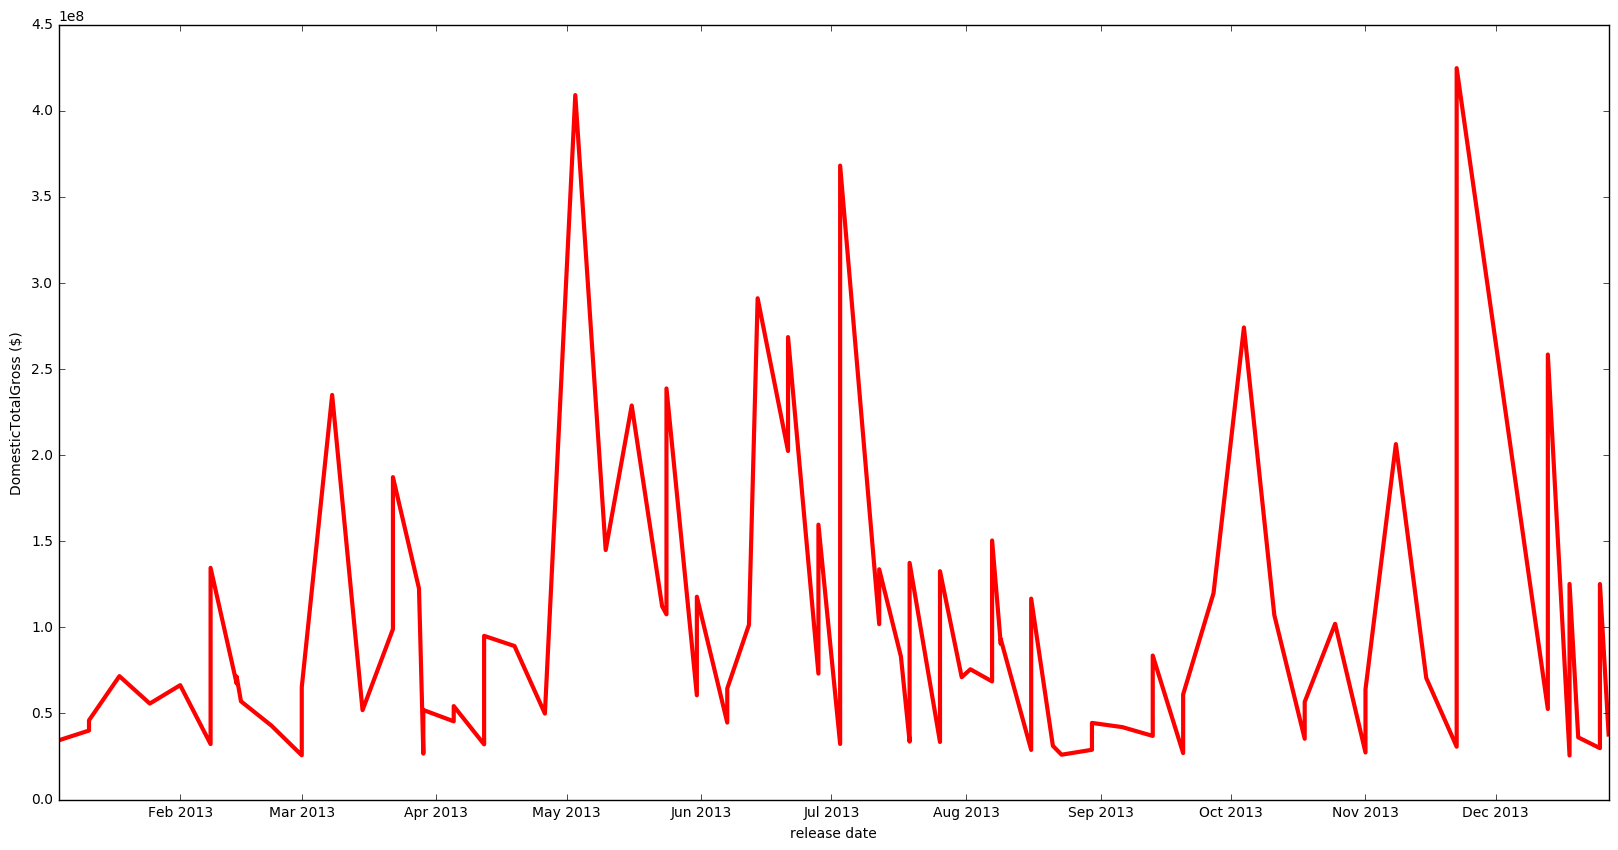

In [40]:
release=df['ReleaseDate']
release_date=[]
for i in release:
    ii=i.split(' ')
    iii=ii[0].split('-')
    release_date.append(datetime.date(int(iii[0]),int(iii[1]),int(iii[2])))
RD, DTG = zip(*sorted(zip(release_date, df['DomesticTotalGross'])))
plt.figure(figsize=(20,10))
plt.plot(RD,DTG,'r',linewidth=3)
plt.xlabel('release date')
plt.ylabel('DomesticTotalGross ($)')
plt.show()

### Exercise 2

- Plot Runtime vs. Domestic Total Gross. 
- Try a scatterplot and a line plot.

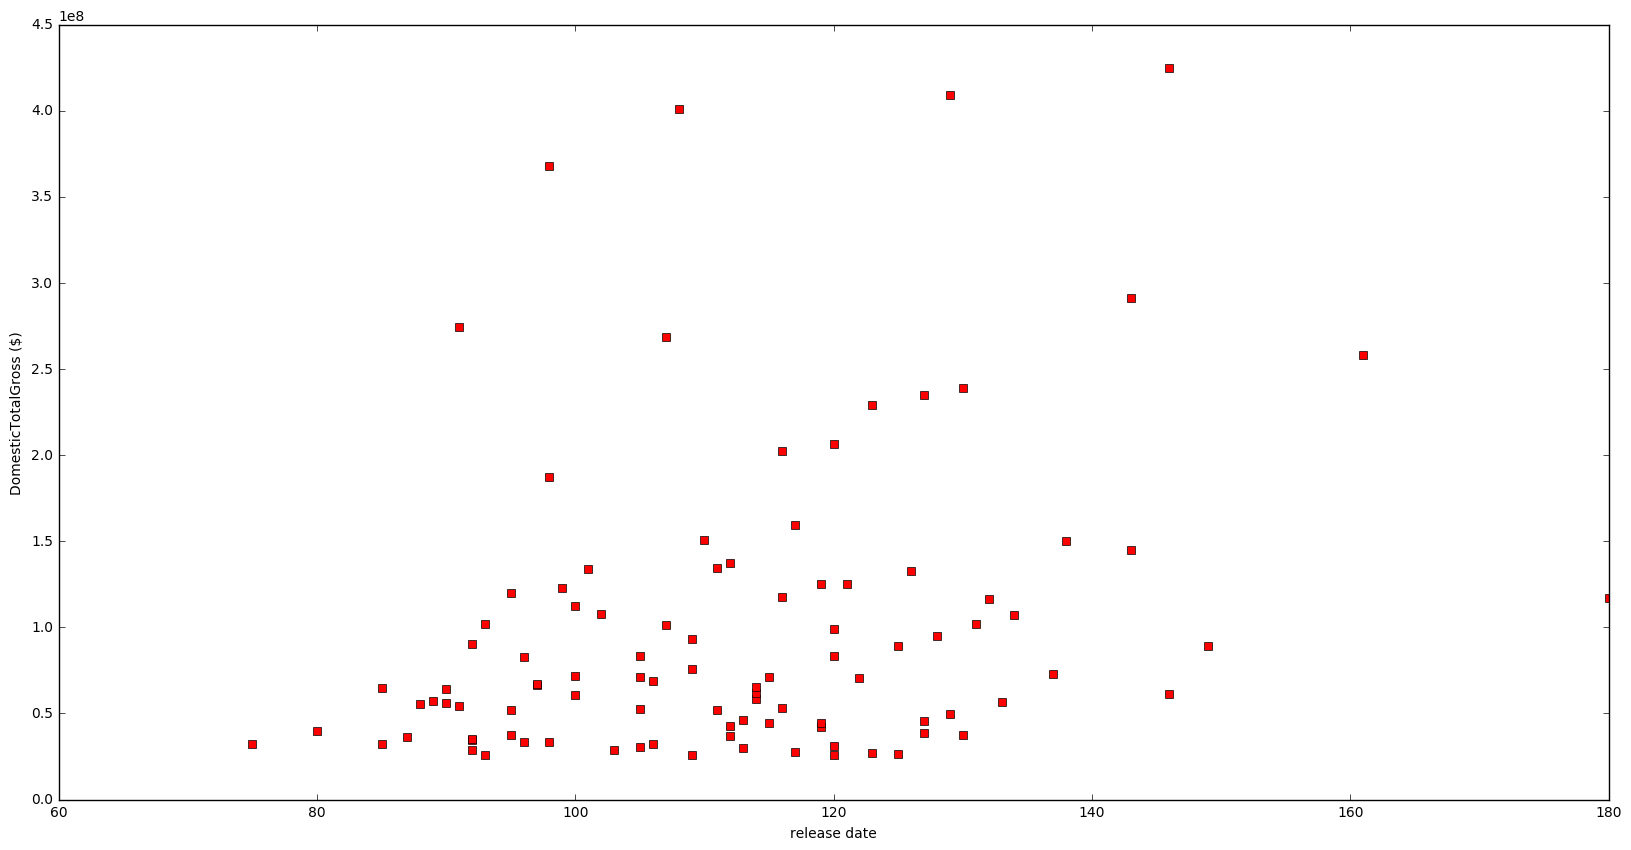

In [41]:
plt.figure(figsize=(20,10))
RT, DTG = zip(*sorted(zip(df['Runtime'], df['DomesticTotalGross'])))
plt.plot(RT,DTG,'rs',linewidth=3)
plt.xlabel('release date')
plt.ylabel('DomesticTotalGross ($)')
plt.show()

### Exercise 3

- Group your data by Rating.
- Find the average runtime and domestic total gross at each level of Rating.

In [42]:
print(df.shape)
print(df['Rating'].value_counts())
df_PG13=df[df['Rating']=='PG-13']
print('Average runtime for PG13 movies = %0.2f mins'%df_PG13['Runtime'].mean())
print('Average domestic gross total for PG13 movies = %0.2f $'%df_PG13['DomesticTotalGross'].mean())
df_R=df[df['Rating']=='R']
print('Average runtime for R movies = %0.2f mins'%df_R['Runtime'].mean())
print('Average domestic gross total for R movies = %0.2f $'%df_R['DomesticTotalGross'].mean())
df_PG=df[df['Rating']=='PG']
print('Average runtime for PG movies = %0.2f mins'%df_PG['Runtime'].mean())
print('Average domestic gross total for PG movies = %0.2f $'%df_PG['DomesticTotalGross'].mean())
df_G=df[df['Rating']=='G']
print('Average runtime for G movies = %0.2f mins'%df_G['Runtime'].mean())
print('Average domestic gross total for G movies = %0.2f $'%df_G['DomesticTotalGross'].mean())

(100, 7)
PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64
Average runtime for PG13 movies = 117.51 mins
Average domestic gross total for PG13 movies = 111449769.02 $
Average runtime for R movies = 110.73 mins
Average domestic gross total for R movies = 69892429.00 $
Average runtime for PG movies = 99.93 mins
Average domestic gross total for PG movies = 131135716.07 $
Average runtime for G movies = 107.00 mins
Average domestic gross total for G movies = 268492764.00 $


### Exercise 4

- Plot Release Date by Domestic Total Gross. Segment by Rating.
- Have all 4 groups on one plot.
- Have 4 separate plots, but part of the same matplotlib figure.

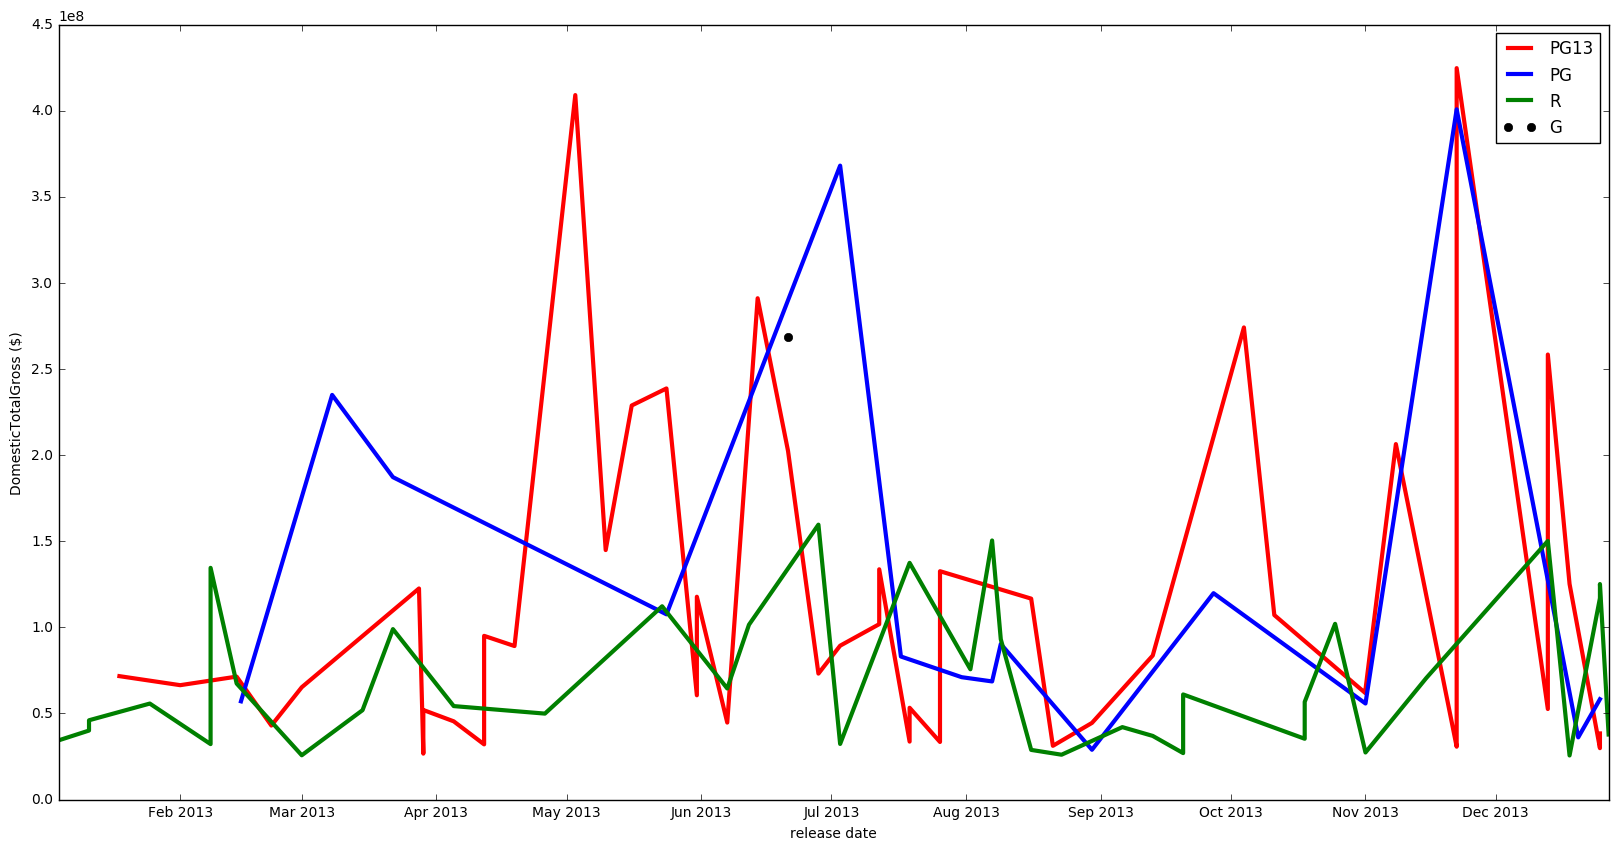

In [43]:
release=df['ReleaseDate']
release_date=[]
for i in release:
    ii=i.split(' ')
    iii=ii[0].split('-')
    release_date.append(datetime.date(int(iii[0]),int(iii[1]),int(iii[2])))
RD, DTG = zip(*sorted(zip(release_date, df['DomesticTotalGross'])))
##
release=df_PG13['ReleaseDate']
release_date=[]
for i in release:
    ii=i.split(' ')
    iii=ii[0].split('-')
    release_date.append(datetime.date(int(iii[0]),int(iii[1]),int(iii[2])))
RD_PG13, DTG_PG13 = zip(*sorted(zip(release_date, df_PG13['DomesticTotalGross'])))
##
release=df_PG['ReleaseDate']
release_date=[]
for i in release:
    ii=i.split(' ')
    iii=ii[0].split('-')
    release_date.append(datetime.date(int(iii[0]),int(iii[1]),int(iii[2])))
RD_PG, DTG_PG = zip(*sorted(zip(release_date, df_PG['DomesticTotalGross'])))
##
release=df_G['ReleaseDate']
release_date=[]
for i in release:
    ii=i.split(' ')
    iii=ii[0].split('-')
    release_date.append(datetime.date(int(iii[0]),int(iii[1]),int(iii[2])))
RD_G, DTG_G = zip(*sorted(zip(release_date, df_G['DomesticTotalGross'])))
##
release=df_R['ReleaseDate']
release_date=[]
for i in release:
    ii=i.split(' ')
    iii=ii[0].split('-')
    release_date.append(datetime.date(int(iii[0]),int(iii[1]),int(iii[2])))
RD_R, DTG_R = zip(*sorted(zip(release_date, df_R['DomesticTotalGross'])))
plt.figure(figsize=(20,10))
graph_PG13=plt.plot(RD_PG13,DTG_PG13,'r',linewidth=3)
graph_PG=plt.plot(RD_PG,DTG_PG,'b',linewidth=3)
graph_R=plt.plot(RD_R,DTG_R,'g',linewidth=3)
graph_G=plt.plot(RD_G,DTG_G,'ko',linewidth=3)
plt.legend(['PG13', 'PG', 'R', 'G'])
plt.xlabel('release date')
plt.ylabel('DomesticTotalGross ($)')
plt.show()


### Exercise 5

- What director in your dataset has the highest gross per movie (highest avg gross)?
- Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.

In [44]:
import numpy as np
director=df['Director']
DTG_vals=df['DomesticTotalGross']
di_dict={} # director dictionary with values as average Domestic Total Gross
for i in range(0,len(director)):
    if (director[i] not in di_dict)&(director[i]!=np.nan):
        di_dict[director[i]]=[DTG_vals[i]]
    elif director[i]!=np.nan:
        di_dict[director[i]]=[DTG_vals[i]]+di_dict[director[i]]
print(di_dict)

{nan: [32244051, 44467206, 45385935, 119793567], 'Ben Stiller': [58236838], 'Jonathan Levine': [66380662], 'Francis Lawrence': [424668047], 'Kirk De MiccoChris Sanders': [187168425], 'Todd Phillips': [112200072], 'James Wan': [83586447, 137400141], 'Jeff Wadlow': [28795985], 'Stephen Frears': [37709979], 'Ric Roman Waugh': [42930462], 'James Mangold': [132556852], 'Tyler Perry': [51975354, 52543354], 'Andrew Niccol': [26627201], 'Chris Wedge': [107518682], 'Seth Gordon': [134506920], 'John Moore': [67349198], 'Bryan Singer': [65187603], 'Baltasar Kormakur': [75612460], 'Steve McQueen (II)': [56671993], 'Luc Besson': [36918811], 'Dan Scanlon': [268492764], 'David O. Russell': [150117807], 'Peter Jackson': [258366855], 'Alfonso Cuaron': [274092705], 'John Lee Hancock': [83301580], 'Kimberly Peirce': [35266619], 'Barry CookNeil Nightingale': [36076121], 'John Luessenhop': [34341945], 'M. Night Shyamalan': [60522097], 'Malcolm D. Lee': [32015787, 70525195], 'Thor Freudenthal': [68559554], 

In [45]:
direc_DTG=df.groupby('Director')['DomesticTotalGross'].mean().sort_values(ascending=False)
print('Directors with top 3 avergae DomesticTotalGross are:\n',direc_DTG[:3])

Directors with top 3 avergae DomesticTotalGross are:
 Director
Francis Lawrence          424668047
Shane Black               409013994
Chris BuckJennifer Lee    400738009
Name: DomesticTotalGross, dtype: int64


### Exercise 6

- Bin the dataset into months and make a bar graph with error bars of gross each year

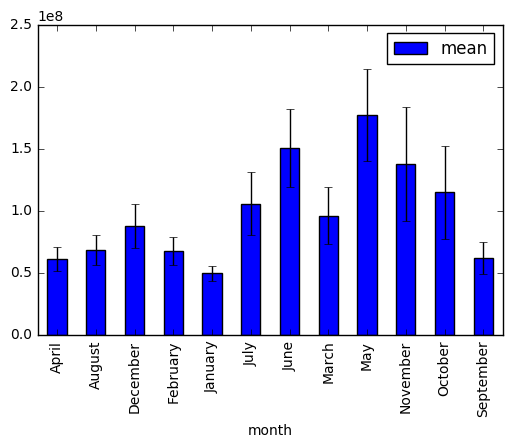

In [77]:
df['rel_date']=df['ReleaseDate'].apply(pd.to_datetime)
df['month']=df['rel_date'].dt.strftime("%B")
month_grouped=df.groupby(df['month'])
monthmeans=month_grouped['DomesticTotalGross'].agg({'count':'count','mean':'mean','std':'std','sme':lambda x:np.std(x)/math.sqrt(len(x))})
#monthmeans.sort_values()
monthmeans1=monthmeans.sort_index()
#print(monthmeans1)
#monthmeans.sort_index(axis=0)
monthmeans.plot(y='mean',yerr='sme',kind='bar')